In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report

In [38]:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [40]:
df.isna().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [42]:
encoded_df = pd.get_dummies(df, columns=['Distance','Weather_Conditions','Traffic_Conditions'])
encoded_df

,Order_ID,Customer_Location,Restaurant_Location,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Distance_24.45,Distance_24.68,Distance_24.9,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",4,Medium,Afternoon,Car,4.1,3.0,26.22,...,False,False,False,False,True,False,False,False,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",8,Low,Night,Car,4.5,4.2,62.61,...,False,False,False,True,False,False,False,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",9,High,Night,Bike,3.3,3.4,48.43,...,False,False,False,False,False,True,False,False,False,True
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",2,Medium,Evening,Bike,3.2,3.7,111.63,...,False,False,False,True,False,False,False,False,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6,Low,Night,Bike,3.5,2.8,32.38,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",8,Medium,Night,Bike,4.7,4.0,50.39,...,False,False,False,True,False,False,False,True,False,False
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",8,Low,Night,Bicycle,3.0,3.6,90.54,...,False,False,False,False,False,True,False,False,False,True
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",4,Medium,Afternoon,Bike,2.9,3.4,73.20,...,False,False,False,False,False,True,False,True,False,False
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",9,Low,Night,Car,3.9,4.8,53.94,...,False,False,False,False,True,False,False,True,False,False


In [44]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [46]:
from sklearn import preprocessing
ar1 = np.array(df['Distance'])
ar1 = preprocessing.normalize([ar1])

ar2 = np.array(df['Delivery_Time'])
ar2 = preprocessing.normalize([ar2])

ar3 = np.array(df['Order_Cost'])
ar3 = preprocessing.normalize([ar3])


In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
print(sc.fit_transform(df[['Distance','Delivery_Time','Order_Cost']]))
#print(sc.transform(df[['Distance','Delivery_Time','Order_Cost']]))
print(df[['Distance','Delivery_Time','Order_Cost']])
df

[[-1.4547383  -1.48793232  0.50185201]
 [ 1.43919167 -0.26498668 -1.63429385]
 [-0.66641712 -0.74152884  1.09264603]
 [ 0.33583508  1.38241083 -0.92332346]
 [-0.70011859 -1.28091542 -0.7797551 ]
 [-0.21950642 -0.32850323 -0.34016838]
 [-0.9301677  -1.40257145 -0.72558801]
 [ 1.62235179 -0.44411007 -1.33812929]
 [ 0.24791822 -0.78219287  0.32266568]
 [ 1.18130221  0.37152309 -1.14626012]
 [ 1.00253793 -1.20362014 -1.48624812]
 [-1.23934199  1.22277929 -0.25221083]
 [-1.48843976 -1.59211291  1.46278778]
 [-1.55730797 -0.50628236 -0.40963163]
 [-0.20924945 -1.38475993 -1.19337305]
 [ 1.35274009 -0.68506968 -0.13494019]
 [ 0.36953654 -1.77997402 -1.00852148]
 [-0.99024422  0.30733441 -1.58274009]
 [-0.42318048 -0.98148025  0.19276702]
 [ 0.31532114  1.17741032  1.40125587]
 [ 1.13734378 -0.91762763  0.6074632 ]
 [-0.92577186 -1.03491481  0.63365127]
 [-0.63857678  0.93342612 -1.47711062]
 [-0.86716062 -1.28629248  1.68146636]
 [-0.06418663  1.17976279  1.537898  ]
 [-1.15582098  0.34430171

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [50]:
mapping_dict = {
    'Traffic_Conditions':{'High':1, 'Medium':0 ,'Low':0},
    'Weather_Conditions':{'Snowy':0, 'Sunny':1, 'Rainy':0 ,'Cloudy':1},
    'Order_Priority':{'High':1, 'Medium':1 ,'Low':0},
}

df['Delivery_Person_Experience'] = df['Delivery_Person_Experience'].apply(lambda x:0 if x<=5 else 1)
df['']
df.replace(mapping_dict, inplace= True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9264\760069854.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping_dict, inplace= True)


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,0,0,0,1,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,1,0,1,0,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,0,0,1,1,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,1,0,0,1,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,0,1,1,0,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,1,1,1,1,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,0,0,1,0,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,0,1,0,1,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,0,1,1,0,Night,Car,3.9,4.8,53.94,354.39,85.25


In [130]:
def classify_delivery(row):
    if row['Traffic_Conditions'] == 0 and row['Weather_Conditions'] == 1 and row['Delivery_Person_Experience'] == 1:
        return 'Fast'  # Fast
    else:
        return 'Delayed'  # Delayed

df['Delivery_Status'] = df.apply(classify_delivery, axis=1)

In [132]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Delivery_Status
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,0,0,0,1,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,Delayed
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,1,0,1,0,Night,Car,4.5,4.2,62.61,152.21,29.02,Fast
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,0,0,1,1,Night,Bike,3.3,3.4,48.43,1644.38,64.17,Delayed
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,1,0,0,1,Evening,Bike,3.2,3.7,111.63,541.25,79.23,Delayed
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,0,1,1,0,Night,Bike,3.5,2.8,32.38,619.81,2.34,Delayed


In [134]:
#EDA
df.describe()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,0.475000,0.255000,0.480000,0.625000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,0.500628,0.436955,0.500854,0.485338,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,0.000000,0.000000,0.000000,0.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,0.000000,0.000000,0.000000,0.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,0.000000,0.000000,0.000000,1.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,1.000000,1.000000,1.000000,1.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


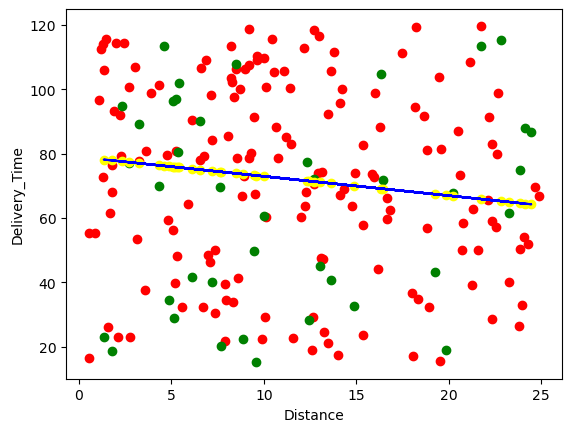

R2 Score :-0.11980151190962984
Mean Squared Error :1056.4110118310139
Mean Absolute Error :27.061280881356858


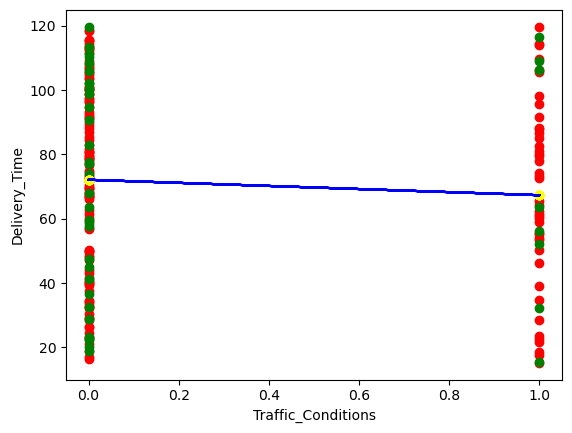

R2 Score :-0.0065365868756805945
Mean Squared Error :1105.0460860971057
Mean Absolute Error :29.237186046511624


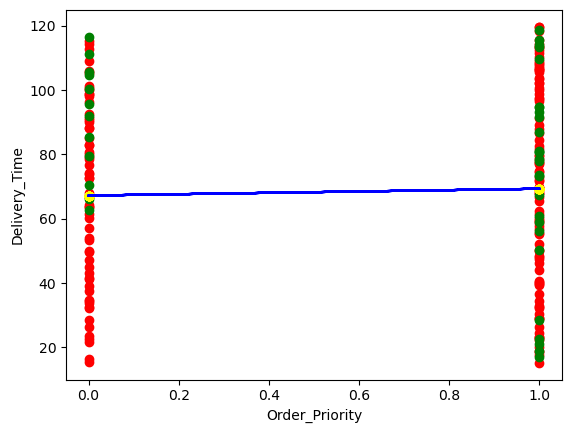

R2 Score :-0.1422000772934644
Mean Squared Error :895.732166831924
Mean Absolute Error :24.649827188940097


In [136]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

a = df.columns

for item in a:
    if item=='Distance' or item=='Traffic_Conditions' or item=='Order_Priority':
        x = df.loc[:,[item]]
        y = df.loc[: ,'Delivery_Time']
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
        model1 = LinearRegression()
        model1.fit(x_train,y_train)
        y_pred = model1.predict(x_test)
        plt.scatter(x_train,y_train, color='red')
        plt.scatter(x_test,y_test, color = 'green')
        plt.scatter(x_test,y_pred, color='yellow')        
        plt.plot(x_test,y_pred, color= 'blue')
        plt.xlabel(item)
        plt.ylabel('Delivery_Time')
        plt.show()
    else:
        continue
    print(f"R2 Score :{r2_score(y_test,y_pred)}")
    print(f"Mean Squared Error :{mean_squared_error(y_test,y_pred)}")
    print(f"Mean Absolute Error :{mean_absolute_error(y_test,y_pred)}")



In [137]:
x1 = df.loc[:,['Traffic_Conditions', 'Weather_Conditions', 'Delivery_Person_Experience']]
y1 = df['Delivery_Status']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2) 

In [140]:
model2 = LogisticRegression()
model2.fit(x1_train, y1_train)

LogisticRegression()

In [142]:
y1_pred = model2.predict(x1_test)
y1_pred

array(['Delayed', 'Fast', 'Delayed', 'Delayed', 'Fast', 'Delayed',
       'Delayed', 'Delayed', 'Delayed', 'Delayed', 'Delayed', 'Delayed',
       'Delayed', 'Fast', 'Delayed', 'Delayed', 'Delayed', 'Delayed',
       'Delayed', 'Delayed', 'Delayed', 'Fast', 'Delayed', 'Delayed',
       'Delayed', 'Fast', 'Delayed', 'Fast', 'Fast', 'Fast', 'Delayed',
       'Fast', 'Delayed', 'Delayed', 'Delayed', 'Delayed', 'Fast', 'Fast',
       'Delayed', 'Delayed'], dtype=object)

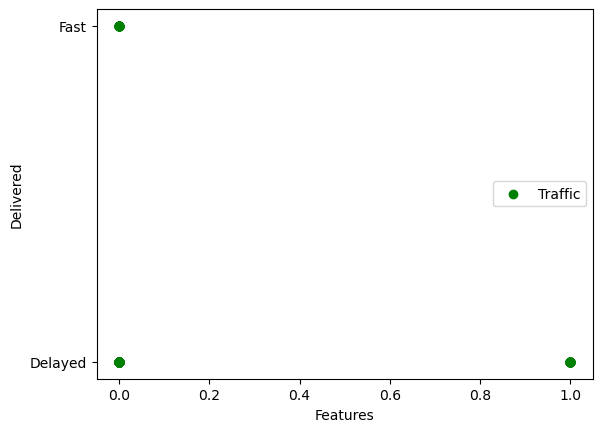

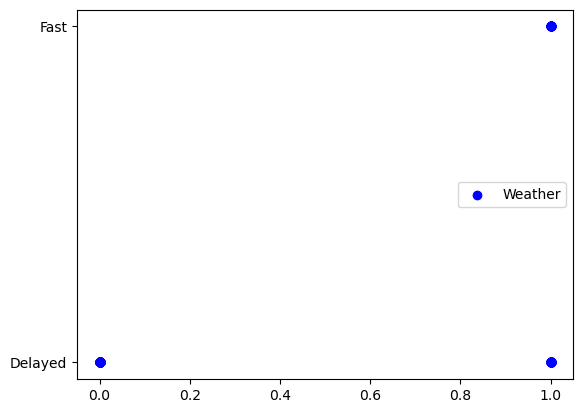

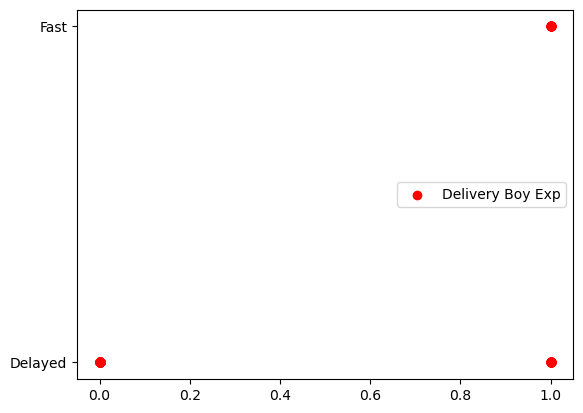

In [144]:
plt.xlabel('Features')
plt.ylabel('Delivered')

pltX = df['Traffic_Conditions']
pltY = df['Delivery_Status']
plt.scatter(pltX, pltY, color = 'green' , label='Traffic')
plt.legend(loc =5, prop={'size':10})
plt.show()
pltX = df['Weather_Conditions']
pltY = df['Delivery_Status']
plt.scatter(pltX, pltY, color = 'blue' , label='Weather')
plt.legend(loc =5, prop={'size':10})
plt.show()
pltX = df['Delivery_Person_Experience']
pltY = df['Delivery_Status']
plt.scatter(pltX, pltY, color = 'red' , label ='Delivery Boy Exp')
plt.legend(loc =5, prop={'size':10})
plt.show()

In [146]:
from sklearn.metrics import accuracy_score, classification_report

print('The accuracy of the model is :',accuracy_score(y1_test, y1_pred))
print('The clssification report is as follows:- \n',classification_report(y1_test, y1_pred))

The accuracy of the model is : 1.0
The clssification report is as follows:- 
               precision    recall  f1-score   support

     Delayed       1.00      1.00      1.00        29
        Fast       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

